In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
train=pd.read_csv('training_set_features.csv')
train.set_index(['respondent_id'],inplace=True)
train

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [8]:
test=pd.read_csv('test_set_features.csv')

In [13]:
labels=pd.read_csv('training_set_labels.csv')

In [19]:
train.shape


(26707, 36)

In [22]:
total=train.join(labels)
total


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,26702,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,26703,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,26704,0,1


In [24]:
labels['xyz_vaccine'].unique()

array([0, 1], dtype=int64)

In [34]:
labels['xyz_vaccine'].value_counts()

xyz_vaccine
0    21033
1     5674
Name: count, dtype: int64

<Axes: ylabel='count'>

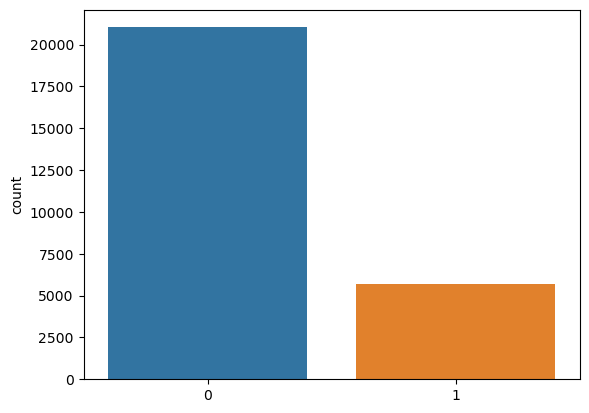

In [52]:
y=labels['xyz_vaccine'].value_counts()
y
x=labels['xyz_vaccine'].unique()
x
sns.barplot(x=x,y=y)


<Axes: ylabel='count'>

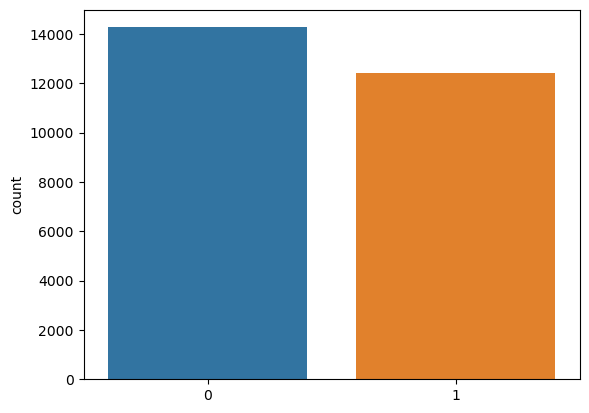

In [250]:
y1=labels['seasonal_vaccine'].value_counts()
y1
x1=labels['seasonal_vaccine'].unique()
sns.barplot(x=x1,y=y1)

creating the model and training our data

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

In [65]:
total.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [68]:
total.dtypes == object

xyz_concern                    False
xyz_knowledge                  False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_xyz                False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_worker                  False
health_insurance               False
opinion_xyz_vacc_effective     False
opinion_xyz_risk               False
opinion_xyz_sick_from_vacc     False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
age_group                       True
education                       True
race                            True
sex                             True
income_poverty                  True
marital_status                  True
r

In [89]:
labels.set_index(['respondent_id'],inplace=True)

In [186]:
X=train.loc[:,['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children']]

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,labels,test_size=0.33,shuffle=True,stratify=labels)

In [188]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [193]:
simpleimputer=SimpleImputer(strategy='median')
X_train_scaled_filled=simpleimputer.fit_transform(X_train_scaled)

In [194]:

X_test_scaled=scaler.fit_transform(X_test)

In [212]:
X_test_scaled_filled=simpleimputer.fit_transform(X_test_scaled)

In [213]:
model=MultiOutputClassifier(LogisticRegression())

In [214]:
model.fit(X_train_scaled_filled,y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [202]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=50,max_iter=100,tol=0.1)

In [215]:
ridge.fit(X_train_scaled_filled,y_train['seasonal_vaccine'])

Ridge(alpha=50, max_iter=100, tol=0.1)

In [217]:
model.score(X_train_scaled_filled,y_train)

0.6526574638126642

In [219]:
model.score(X_test_scaled_filled,y_test)

0.6505559337417745

In [205]:
model.score(X_train_scaled_filled,y_train['seasonal_vaccine'])

0.6068294863913262

In [206]:
model.score(X_test_scaled_filled,y_test['seasonal_vaccine'])

0.6093714545041978

In [221]:
pred1=model.predict_proba(X_test_scaled_filled)
pred1

[array([[0.82384925, 0.17615075],
        [0.9897774 , 0.0102226 ],
        [0.29991085, 0.70008915],
        ...,
        [0.37584646, 0.62415354],
        [0.92817141, 0.07182859],
        [0.43594296, 0.56405704]]),
 array([[0.10775746, 0.89224254],
        [0.98003815, 0.01996185],
        [0.05904643, 0.94095357],
        ...,
        [0.30092648, 0.69907352],
        [0.75060768, 0.24939232],
        [0.30390259, 0.69609741]])]

In [222]:
pred1[1].shape

(8814, 2)

In [224]:
y_prediction=pd.DataFrame({
    'xyz_vaccine':pred1[0][:,1],
    'seasonal_vaccine':pred1[1][:,1],
},
index=y_test.index)
y_prediction

,xyz_vaccine,seasonal_vaccine
respondent_id,,
655,0.176151,0.892243
14115,0.010223,0.019962
24170,0.700089,0.940954
14966,0.115915,0.575844
16298,0.404055,0.805912
...,...,...
18603,0.153572,0.495368
5361,0.018011,0.060881
7719,0.624154,0.699074


In [225]:
roc_auc_score(y_test,y_prediction)

0.8293332797008495

Now training this model on given test_set

In [231]:
test


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [232]:
X1=test.loc[:,['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children']]

In [233]:
X1_scaled=scaler.fit_transform(X1)

In [234]:
X1_scaled_filled=simpleimputer.fit_transform(X1_scaled)

In [236]:
test_prediction=model.predict_proba(X1_scaled_filled)
test_prediction

[array([[0.87167766, 0.12832234],
        [0.93976906, 0.06023094],
        [0.58753548, 0.41246452],
        ...,
        [0.80406318, 0.19593682],
        [0.94529186, 0.05470814],
        [0.39737271, 0.60262729]]),
 array([[0.57651576, 0.42348424],
        [0.92581375, 0.07418625],
        [0.35413533, 0.64586467],
        ...,
        [0.59140231, 0.40859769],
        [0.68112642, 0.31887358],
        [0.36020265, 0.63979735]])]

In [239]:
submission=pd.read_csv('submission_format.csv')
submission.set_index(['respondent_id'],inplace=True)

In [240]:
submission

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7
...,...,...
53410,0.5,0.7
53411,0.5,0.7
53412,0.5,0.7


In [242]:
submission['h1n1_vaccine']=test_prediction[0][:,1]
submission['seasonal_vaccine']=test_prediction[1][:,1]

In [243]:
submission

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.128322,0.423484
26708,0.060231,0.074186
26709,0.412465,0.645865
26710,0.455941,0.806590
26711,0.265343,0.651638
...,...,...
53410,0.351370,0.569406
53411,0.068704,0.242554
53412,0.195937,0.408598


In [251]:
submission.to_csv('submission_dataset.csv',index=True)